In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('K-means-clustering.csv',sep=",")
print(data)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001003    Male     Yes          1      Graduate            No   
1    LP001005    Male     Yes          0      Graduate           Yes   
2    LP001006    Male     Yes          0  Not Graduate            No   
3    LP001008    Male      No          0      Graduate            No   
4    LP001013    Male     Yes          0  Not Graduate            No   
..        ...     ...     ...        ...           ...           ...   
376  LP002953    Male     Yes         3+      Graduate            No   
377  LP002974    Male     Yes          0      Graduate            No   
378  LP002978  Female      No          0      Graduate            No   
379  LP002979    Male     Yes         3+      Graduate            No   
380  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               4583             1508.0       128.0           

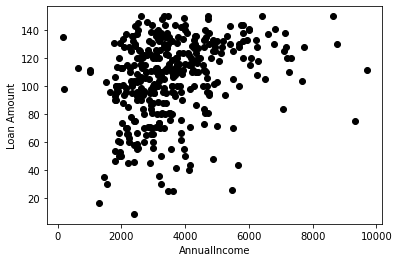

In [3]:
X = data[["LoanAmount","ApplicantIncome"]]
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount')
plt.show()

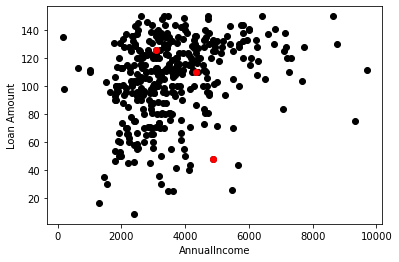

In [4]:
# choose 3 clusters at random
K=3

# select random point as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount')
plt.show()

In [5]:
# step 3 - assign all the points to the closest cluster centroid
# step 4 - recomput centroids of newly formed clusters
# step 5 - repeat 3 and 4

diff = 1
j = 0 

while (diff!=0):
    XD = X
    i = 1
    for index1,row_c in Centroids.iterrows():
        ED = []
        for index2,row_d in XD.iterrows():
            d1 = (row_c["ApplicantIncome"] - row_d["ApplicantIncome"])**2
            d2 = (row_c["LoanAmount"] - row_d["LoanAmount"])**2
            d = np.sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i = i + 1
        
    C=[]
    for index,row in X.iterrows():
        min_dist = row[1]
        pos = 1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i + 1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

<ipython-input-5-c7ccc9a6027a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ED
<ipython-input-5-c7ccc9a6027a>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


301.50327480362864
97.37918354134646
-0.5144377521489645
-9.190752402517077
-9.19844100901777
-9.237706177129652
0.0


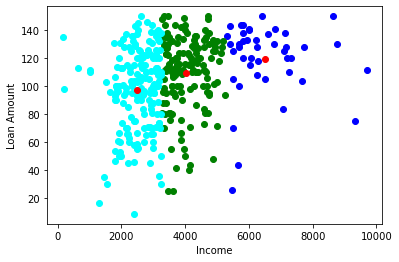

In [6]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()

### Example 2 in git
<br>For this example we will be using data relating to Facebook live sellers in Thailand. The data includes information on the type of posts as well as the number of likes, reacts to those posts etc.
<br>Data Source:https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

In [7]:
df=pd.read_csv("https://raw.githubusercontent.com/hylu666/hku-physics3151/master/clustering/clustering-example-2.csv",sep=",")
X = df.drop(columns=['status_id','status_type','status_published'])
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=list(X.columns.values))
X = X_scaled
print(X.shape)

(7050, 9)


#### Pricipal Components first
<br> Using PCA to reduce the data to 3D for easy visualization.

In [16]:
cov = np.cov(X,rowvar=False)

In [17]:
from numpy import linalg as la
P,D,PInv = la.svd(cov)
print(D)
print(P.shape)

[3.44988608e+00 1.73632770e+00 9.65063819e-01 8.34889178e-01
 7.92760921e-01 6.92609821e-01 3.80457257e-01 1.49281986e-01
 1.64841600e-08]
(9, 9)


In [18]:
P_reduced = P[:,:3]
print(P_reduced.shape)
principalComponents = np.dot(X,P_reduced)
print(principalComponents.shape)

(9, 3)
(7050, 3)


<br> Before clustering, we can have a look at the figure of reduced data in 3D.

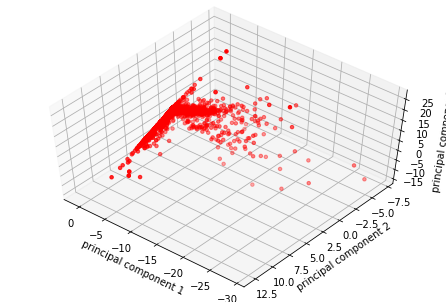

In [19]:
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)
x = principalComponents[:,0]
y = principalComponents[:,1]
z = principalComponents[:,2]
ax.scatter(x,y,z, c='r', marker='o', s=12)
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('principal component 3')
ax.view_init(elev=55,azim=130)
plt.show()


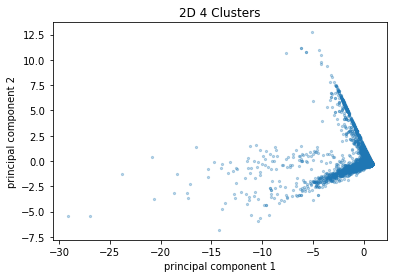

In [25]:
x =principalComponents[ : ,0]
y =principalComponents[ : ,1]
plt.scatter(x, y,s=5, alpha=0.3)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('2D 4 Clusters')

plt.show()

#### Clustering Function
<br> K-means repeats 2 steps: 
1. Cluster assignment according to the centroids set before. 
2. Take each centroid and move to the average of the correspondingly assigned data points.

In [26]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=1):
    # First we need to randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    # Next, loop to approach the optimal position of the centroids
    while True:
        # Assign labels based on closest centroid
        labels = pairwise_distances_argmin(X, centers)
        
        # Find new centroid from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    return centers, labels

#### Elbow Method
<br>We want a measurement for the clustering and here we define the distortion(distortion cost function):
<br>$J=\frac{1}{m}\sum_{i=1}^m||x^{(i)}-\mu_{c^{i}}||^2$
<br>Choosing the number of clusters is of great importance. Here we introduce Elbow method, which is to vary K and compute cost function at a range of K values. And while the cost_function decrease, we choose the elbow point in the plot as K. Note, it can happen that you don't get a a nice line -> no clear elbow on curve.

In [27]:
def distortion(X,n_clusters):
    centers, labels = find_clusters(principalComponents, n_clusters)
    cost = 0
    for i in range(0,len(X)):
        cost = cost + np.square(np.linalg.norm(X[i]-centers[labels[i]]))
    cost = cost/len(X)
    return cost

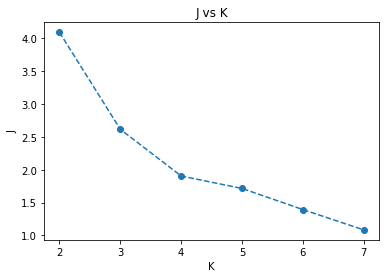

In [28]:
Kn=[]
distortions=[]
for i in range(2,8):
    Kn.append(i)
    distortions.append(distortion(principalComponents,i))
plt.plot(Kn,distortions,ls='--',marker='o')
plt.xlabel('K')
plt.ylabel('J')
plt.title('J vs K')
plt.show()

#### Clustering Visualization
<br> choose K to be 4 and plot the clusters

In [29]:
centers, labels = find_clusters(principalComponents, 4)
print(centers)

[[-11.71909405  -1.91858786  -1.49220877]
 [ -1.62133877   4.50613571   0.44936976]
 [  0.55809651  -0.15465399  -0.08518157]
 [ -2.80152363  -1.1589808    0.80325127]]


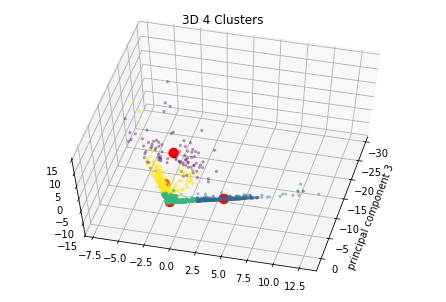

In [30]:
fig = plt.figure()
ax = Axes3D(fig)
x = principalComponents[:,0]
y = principalComponents[:,1]
z = principalComponents[:,2]
ax.scatter(x, y, z, c=labels, s=5, alpha=0.3)
ax.scatter(centers[:,0], centers[:,1], centers[:,2], c='red', s=90, alpha=1)
ax.set_xlabel('principal component 1')
ax.set_xlabel('principal component 2')
ax.set_xlabel('principal component 3')
ax.set_zlim(-15,15)
ax.set_title('3D 4 Clusters')
ax.view_init(elev=60,azim=14)
plt.show()

[[-11.71909405  -1.91858786  -1.49220877]
 [ -1.62133877   4.50613571   0.44936976]
 [  0.55809651  -0.15465399  -0.08518157]
 [ -2.80152363  -1.1589808    0.80325127]]


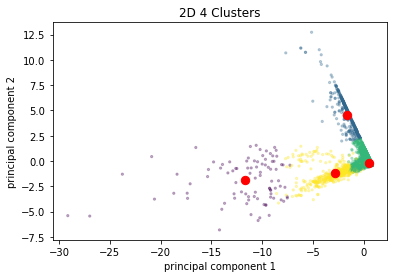

In [31]:
centers, labels = find_clusters(principalComponents, 4)
print(centers)

x =principalComponents[ : ,0]
y =principalComponents[ : ,1]
plt.scatter(x, y, c= labels,s=5, alpha=0.3)
plt.scatter(centers[:,0], centers[:,1],c='red', s=70, alpha=1)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('2D 4 Clusters')

plt.show()